<a href="https://colab.research.google.com/github/ej29-r3d/MIT-Loan-Default-Prediction/blob/main/Capstone_Project_Reference_Notebook_Loan_Default_Prediction_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

Home loans is an important revenue stream for retail banks, primarily driven by interest payments from borrowers. However, there are substantial risks of loan defaults that can severely impact earnings. So,it is vital to proeprly assess the creditworthiness of applicants. Currently, this process is manual, labor-intensive, and susceptible to human error and biases.

The advent of data science and machine learning is an opportunity to automate and enhance the loan approval process. However, it is essential that these automated systems do not perpetuate or exacerbate existing biases from historical human decisions. Also the system should provide interpretation and justification for the rejections


### **The objective:**

 - **Develop a Classification Model** to identify potential defaulters among creditors
 - **Ensure the Model is Interpretable** and provides clear justifications for loan rejections
 - **Mitigate Biases** to be minimize the impact of previously made decisions
 - **Provide Weights for Features Importance** to recommend key features that should influence the decision


### **The key questions:**

- What are the primary factors influencing loan defaults?
- How can we measure and mitigate biases in the loan approval process?
- Which machine learning techniques are most effective for predicting loan defaults?
- How can we ensure the model’s predictions are interpretable and actionable for the bank’s credit officers?
- How can the model be integrated into the bank’s existing loan approval workflow?


### **The problem formulation**:

The specific problem to address is developing a machine learning-based classification model that predicts the likelihood of a loan applicant defaulting. This model should utilize historical data from the bank’s loan underwriting process and must be interpretable to comply with the Equal Credit Opportunity Act’s guidelines. The solution should also address and mitigate any biases in the historical data to ensure fair and equitable credit decisions.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

import math
from scipy.stats import pointbiserialr


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

In [ ]:
# Start by mounting the Google Drive in order to access the dataset
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [ ]:
# Importing the dataset

data = pd.read_csv('/content/drive/My Drive/MIT_Data_Science/Capstone Project/hmeq.csv')

## Summary Statistics

In [ ]:
# Check the DataFrame’s dimensions
data.shape

(5960, 13)

In [ ]:
# Info of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


- There are 5960 rows and 13 columns
- There are 2 categorical features and 11 numerical ones (2 integer and 9 float)
- For further tasks let's create lists of numerical and categorical features. 'BAD' won't be in numerical features as it is a label column

In [ ]:
# Create lists of numerical and categorical features

num_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
cat_cols = ['REASON', 'JOB']

## Summary statistics

### Numerical columns

In [ ]:
# Checking summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


- Label variable 'BAD' is binary. Approximately 20% of the cases are classified as "BAD"
- 'LOAN', 'MORDUE', 'VALUE', 'YOJ', 'CLAGE', 'CLNO', 'DEBTINC' varie widely
- 'DEROG' - mean is close to zero and a high frequency of zero values. Most applicants don't have it
- 'DELINQ' - similarly as with 'DEROG'

### Categorical columns

In [ ]:
# Create a summary table for categorical features that includes unique values, the most frequent value, and its frequency

def categorical_summary(data):
    summary = []
    for col in data.select_dtypes(include=['object']).columns:
        unique_values = data[col].unique().tolist()
        most_freq_value = data[col].mode()[0]
        freq_most_freq_value = (data[col] == most_freq_value).mean() * 100
        summary.append([col, unique_values, most_freq_value, f"{freq_most_freq_value:.2f}%"])
    return pd.DataFrame(summary, columns=['Feature', 'Unique Values', 'Most Frequent Value', 'Frequency of Most Frequent Value'])

cat_summary = categorical_summary(data)

In [ ]:
# Display the summary table

def display_markdown_table(data):
    table = data.to_markdown(index=False)
    display(Markdown(table))

display_markdown_table(cat_summary)

| Feature   | Unique Values                                               | Most Frequent Value   | Frequency of Most Frequent Value   |
|:----------|:------------------------------------------------------------|:----------------------|:-----------------------------------|
| REASON    | ['HomeImp', nan, 'DebtCon']                                 | DebtCon               | 65.91%                             |
| JOB       | ['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'] | Other                 | 40.07%                             |

- 2 reasons for loans. Most for debt consolidation
- A large portion of applicants fall into the 'Other' job category, with the remaining distributed across various professions

### Treat missing values

In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
# Check missing values
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

- There are a lot of missing values in most of the columns. These missing values should be treated before building models
- Let's make a copy of dataset with which we will work further

In [ ]:
# Create copy of the dataset
df = data.copy()

We will input median values for numerical columns and mode values for categorical columns instead of missing values:

In [ ]:
# Input median values instead of missing ones for numerical columns
df['DEBTINC'].fillna(df['DEBTINC'].median(), inplace=True)
df['MORTDUE'].fillna(df['MORTDUE'].median(), inplace=True)
df['VALUE'].fillna(df['VALUE'].median(), inplace=True)
df['YOJ'].fillna(df['YOJ'].median(), inplace=True)
df['DEROG'].fillna(df['DEROG'].median(), inplace=True)
df['DELINQ'].fillna(df['DELINQ'].median(), inplace=True)
df['CLAGE'].fillna(df['CLAGE'].median(), inplace=True)
df['NINQ'].fillna(df['NINQ'].median(), inplace=True)
df['CLNO'].fillna(df['CLNO'].median(), inplace=True)

# Input mode values instead of missing ones for categorical columns
df['REASON'].fillna(df['REASON'].mode()[0], inplace=True)
df['JOB'].fillna(df['JOB'].mode()[0], inplace=True)


### Check duplicates

In [ ]:
# Check for duplicates
duplicates = df.duplicated()

# Display the number of duplicate rows
print(f'Number of duplicate rows: {duplicates.sum()}')

# View the duplicate rows
duplicate_rows = df[duplicates]
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [BAD, LOAN, MORTDUE, VALUE, REASON, JOB, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC]
Index: []


There are no duplicates in the dataset

- Observations from Summary Statistics

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


### Histograms and boxplots for numerical features

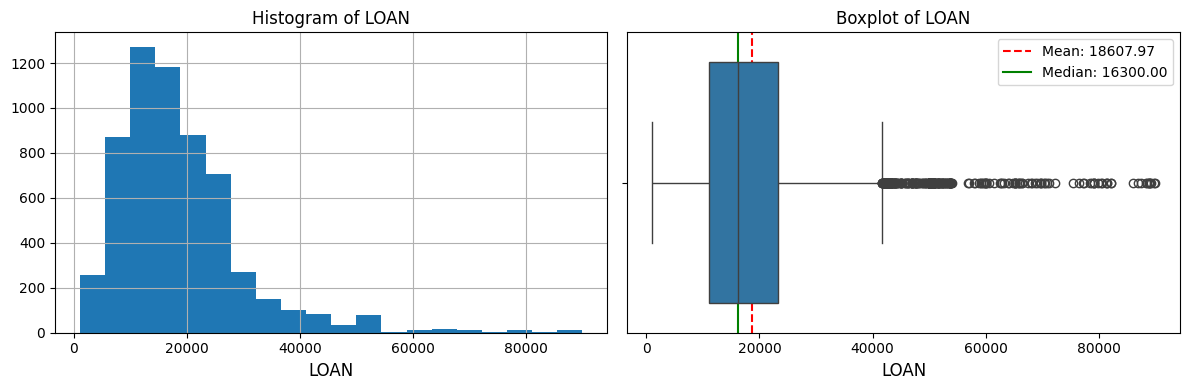

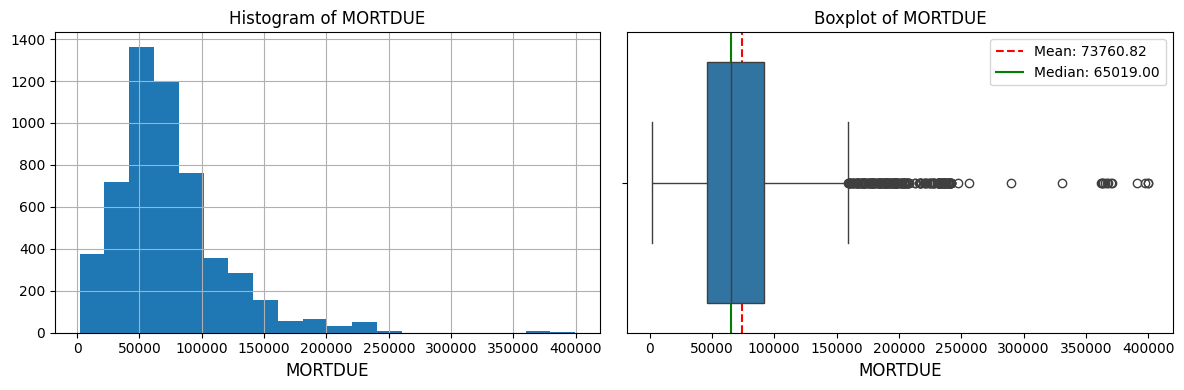

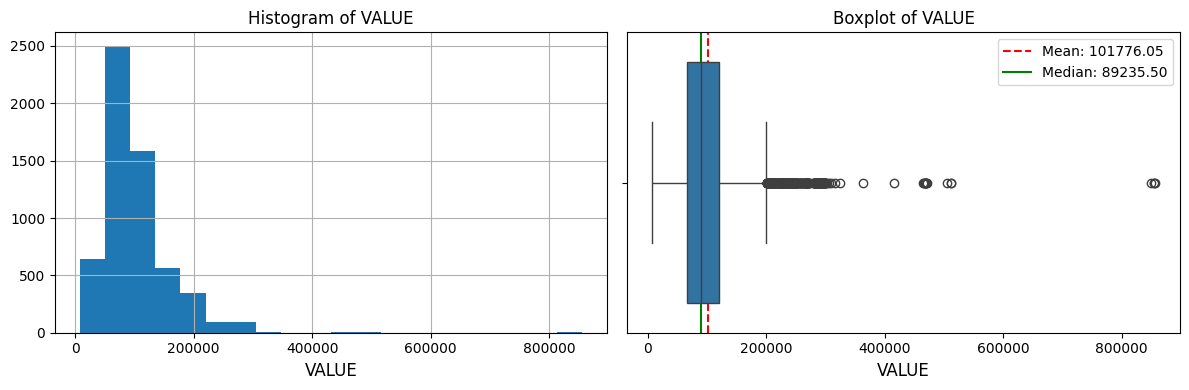

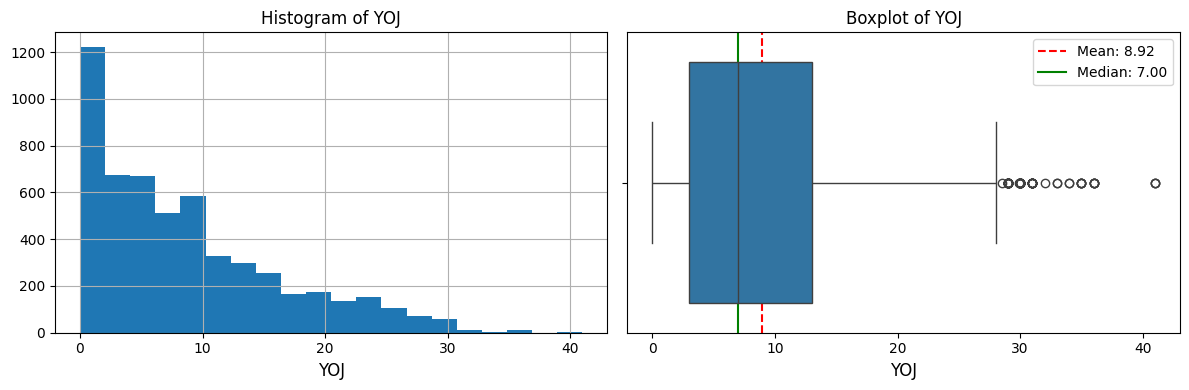

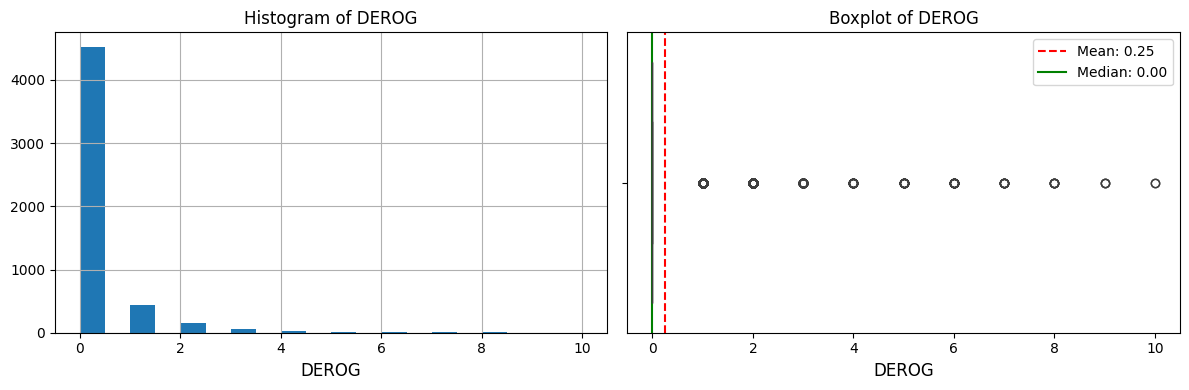

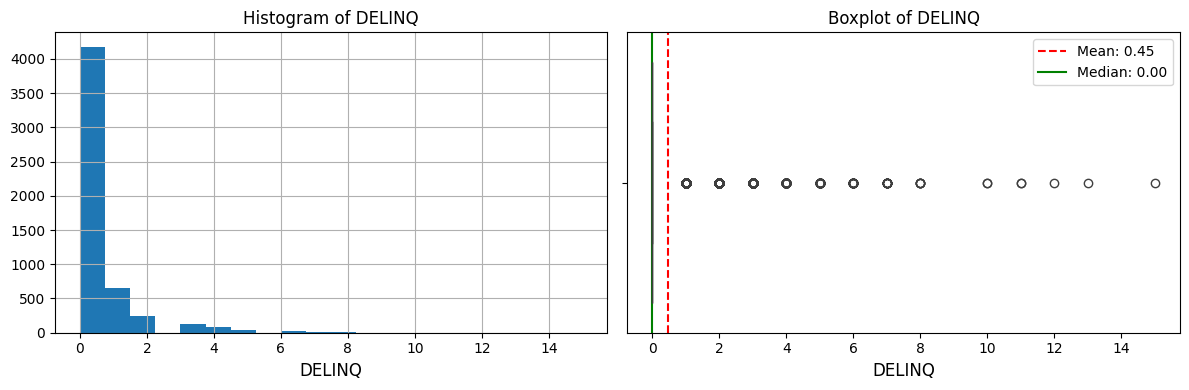

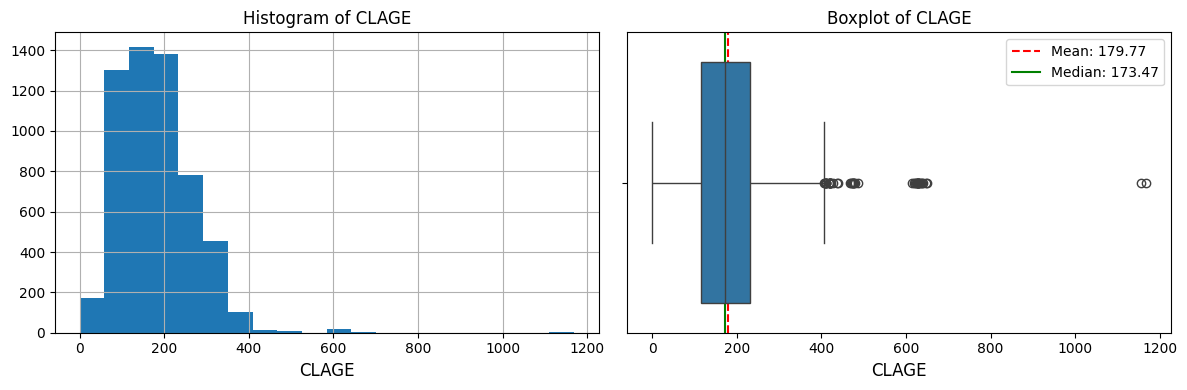

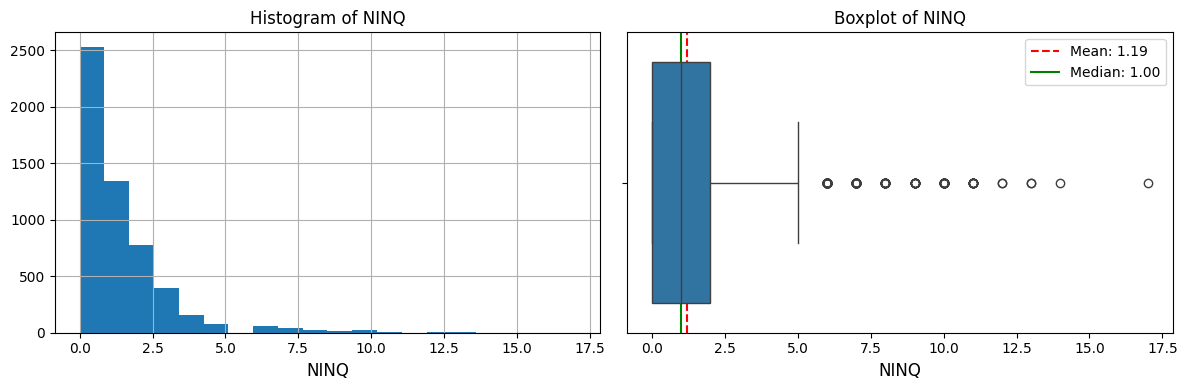

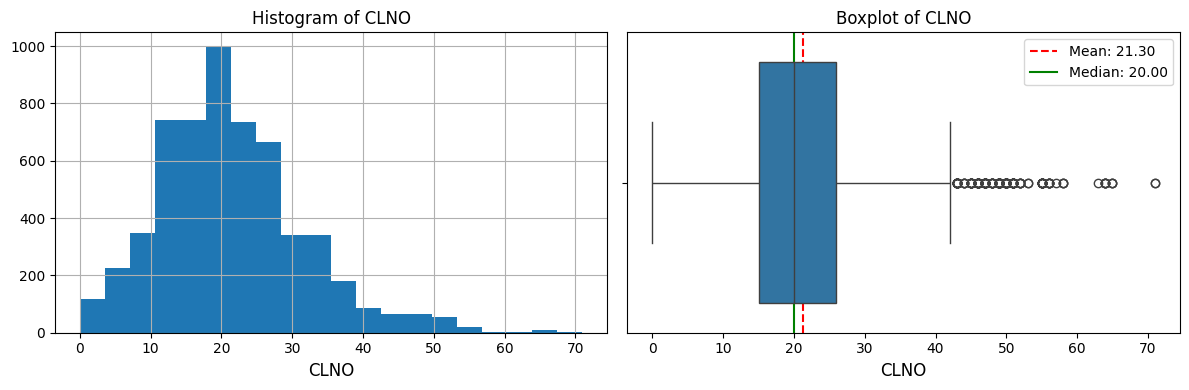

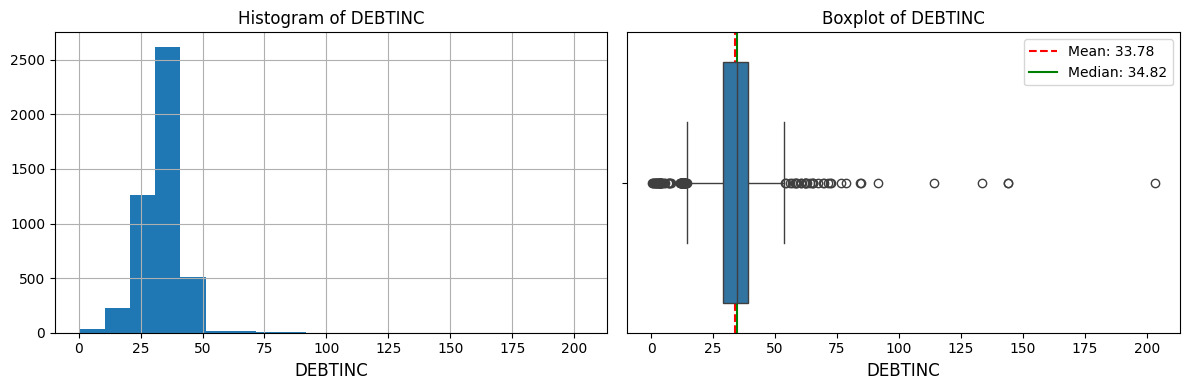

In [ ]:
# Creating histogram and boxplot
for col in num_cols:
  num_feature = col

  plt.figure(figsize = (12,4))
  plt.subplot(1, 2, 1)
  plt.title(f'Histogram of {num_feature}', fontsize=12)
  plt.xlabel(num_feature, fontsize=12)

  data[num_feature].hist(bins = 20)
  plt.subplot(1, 2, 2)
  plt.title(f'Boxplot of {num_feature}', fontsize=12)
  plt.xlabel(num_feature, fontsize=12)

  # Adding annotations for mean and median
  mean_value = data[num_feature].mean()
  median_value = data[num_feature].median()

  plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
  plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')

  sns.boxplot(x = data[num_feature],legend='full')

  # Display the legend
  plt.legend()

  plt.tight_layout()
  plt.show()

[<Axes: > <Axes: >]


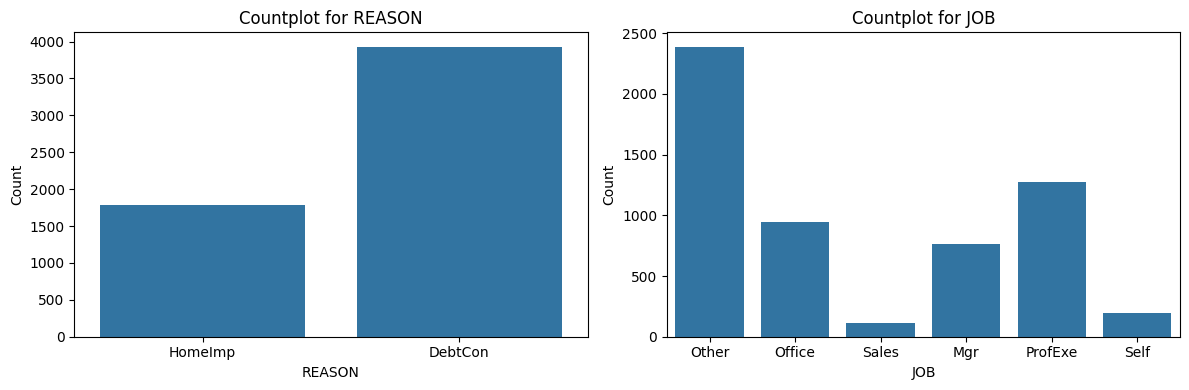

In [ ]:
nrows = 1  # Number of rows in grid
ncols = 2  # Number of columns

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4))
print(axes)
for i, column in enumerate(cat_cols):
    row = 0
    col = i % ncols
    sns.countplot(
        data=data,
        x=column,
        ax=axes[i]
        )
    axes[i].set_title(f'Countplot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')


plt.tight_layout()
plt.show()

### **Bivariate Analysis**

In [ ]:
# Look at relationship betweem 'REASON' and 'BAD'

data.groupby('REASON')['BAD'].value_counts(normalize=True)


REASON   BAD
DebtCon  0      0.810336
         1      0.189664
HomeImp  0      0.777528
         1      0.222472
Name: proportion, dtype: float64

In [ ]:
# Check correlation and p_value between the value of the property and the loan default rate
correlation, p_value = pointbiserialr(df['BAD'], df['VALUE'])

print('Correlation: ', correlation, '\np_value: ', p_value)


Correlation:  -0.0364923819754646 
p_value:  0.004838446664873052


In [ ]:
# Check correlation and p_value between the value of the property and the mortgage amount
correlation, p_value = pointbiserialr(df['BAD'], df['MORTDUE'])

print('Correlation: ', correlation, '\np_value: ', p_value)


Correlation:  -0.04618603498418296 
p_value:  0.0003614150486121347


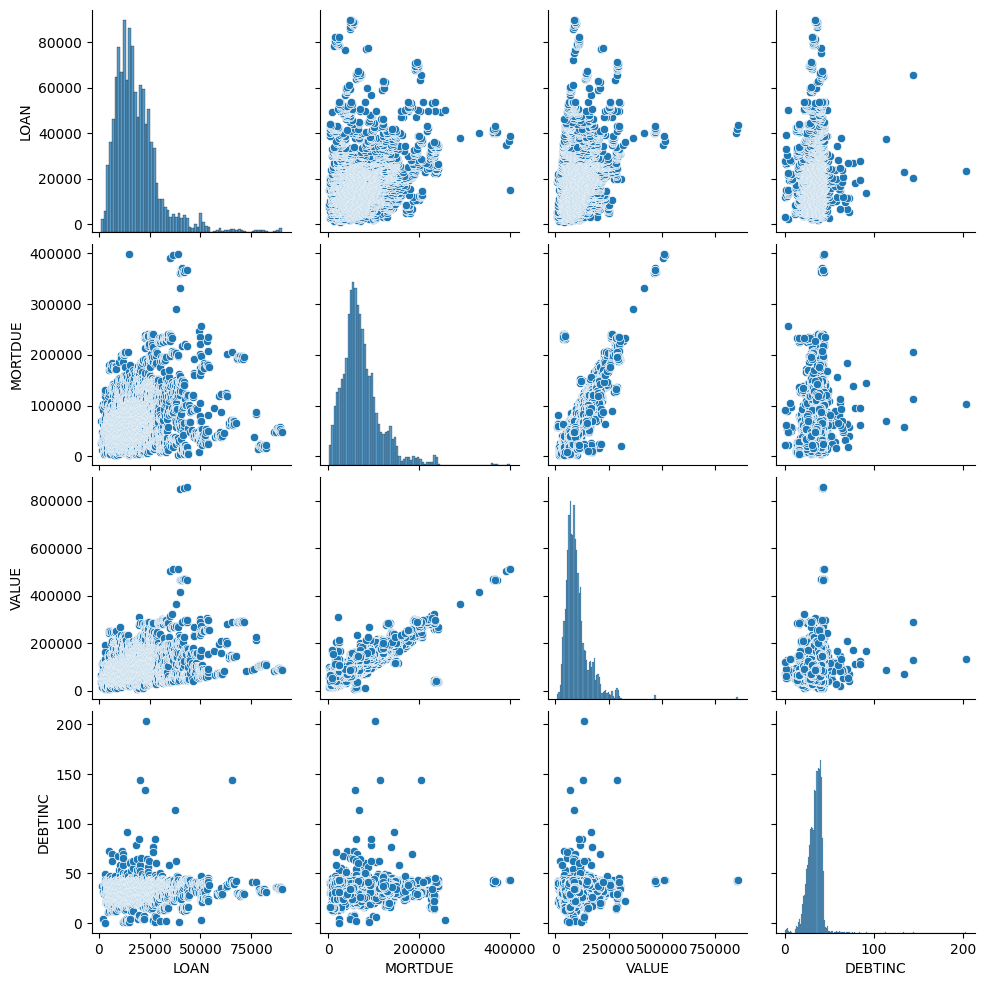

In [ ]:
# Pairplot
sns.pairplot(data[['LOAN', 'MORTDUE', 'VALUE', 'DEBTINC']])
plt.show()

### **Multivariate Analysis**

             LOAN   MORTDUE     VALUE       YOJ     DEROG    DELINQ     CLAGE  \
LOAN     1.000000  0.216380  0.331522  0.096878  0.006996 -0.028869  0.088237   
MORTDUE  0.216380  1.000000  0.788736 -0.076201 -0.047123  0.003580  0.129799   
VALUE    0.331522  0.788736  1.000000  0.013638 -0.043808 -0.008158  0.169536   
YOJ      0.096878 -0.076201  0.013638  1.000000 -0.057729  0.051580  0.186203   
DEROG    0.006996 -0.047123 -0.043808 -0.057729  1.000000  0.171286 -0.079482   
DELINQ  -0.028869  0.003580 -0.008158  0.051580  0.171286  1.000000  0.026324   
CLAGE    0.088237  0.129799  0.169536  0.186203 -0.079482  0.026324  1.000000   
NINQ     0.045266  0.032582 -0.002539 -0.062837  0.146590  0.059194 -0.109736   
CLNO     0.074317  0.318515  0.265029  0.032815  0.052075  0.161153  0.233802   
DEBTINC  0.068938  0.134575  0.113080 -0.046482  0.020542  0.048307 -0.040741   

             NINQ      CLNO   DEBTINC  
LOAN     0.045266  0.074317  0.068938  
MORTDUE  0.032582  0.318515 

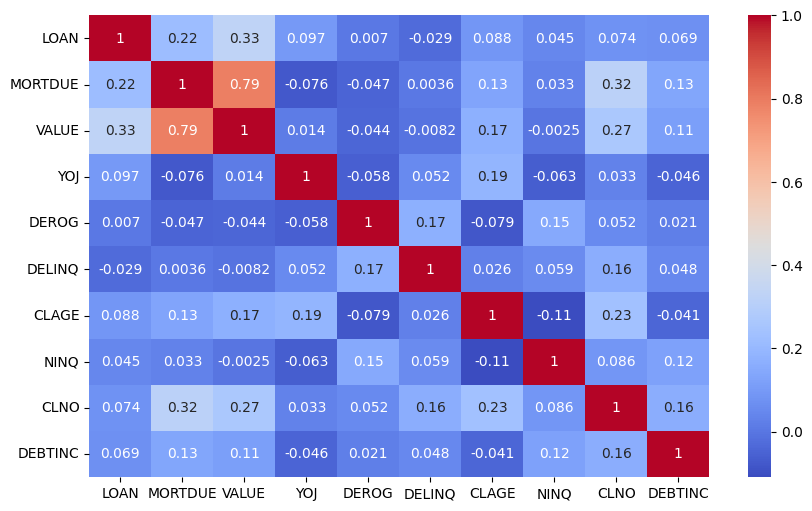

In [ ]:
# Correlation analysis
correlation_matrix = df[num_cols].corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

- There is only 1 pair of variables that have significant correlation with each other: 'VALUE' and 'MORTDUE'

## **Important Insights from EDA**

## Answers on Questions

- Q: What is the range of values for the loan amount variable "LOAN"?
- A: 'LOAN' has bell-shaped distribution that is highly right-skewed
  

- Q: How does the distribution of years at present job "YOJ" vary across the dataset?
- A: Most of applicants have from 0 to 10 years at present job with median value = 7 years. Big part of them have only 0, 1 or 2 years. However, there are a lot applicants with 20 and more years
  

- Q: How many unique categories are there in the REASON variable?
- A: 2 unique catories: DebtCon (debt cosolidation) and Homelmp (home improvement). Also there are some missing values
  

- Q: What is the most common category in the JOB variable?
- A: The most common category in 'Job' is 'Other' with 40% of applicants
  

- Q: Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
- A:There are no strong relationship between REASON and default: both reasons to give a loan generated roughly the same probability of default
  

- Q: Do applicants who default have a significantly different loan amount compared to those who repay their loan?
- A:Applicants that default have 2k higher amount of the loan (~10% difference)
  

- Q: Is there a correlation between the value of the property and the loan default rate?
- A: There are no correlation between these variables
  
  
- Q: Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?
- A: There are no significant differencies

## Other importand highlights from EDA

- There is only 1 pair of variables that have significant correlation with each other: 'VALUE' and 'MORTDUE'. They should be treated before Logistical Regression modelling
- 'LOAN', 'MORTDUE', 'VALUE', 'CLAGE', 'CLNO', 'DEBTINC' have bell-shaped right-skewed distributions with significant outliers that should be treated for logistcal regression model
- A lot of missing values in data that were treated by inputing mean and mode values


## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [ ]:
df1 = df.copy() # Copy data for using the dataset for logistic regression

As 'VALUE' and 'MORTDUE' are multicollinear, it is important treat them. We will create a combined feature

In [ ]:
# Create combined feature
df1['COMBINED'] = df1['VALUE'] + df1['MORTDUE']

# Drop multicolinear columns
df1.drop(columns = ['MORTDUE', 'VALUE'], inplace=True)

## Treating Outliers and Normalization

- 'LOAN', 'COMBINED', 'CLAGE', 'NINQ' have significant outliers. Let's limit them with winsorization
- Other variables could be normalized with standardscaler

In [ ]:
df1.head()

,BAD,LOAN,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,COMBINED
0,1,1100,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,64885.0
1,1,1300,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,138453.0
2,1,1500,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,30200.0
3,1,1500,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,154254.5
4,0,1700,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,209800.0


In [ ]:
def winsorize_outliers(df1, columns, caps):
    for column, cap in zip(columns, caps):
        df1[column] = df1[column].clip(lower=df1[column].quantile(0.10), upper=df1[column].quantile(0.90)) # Use df1 instead of df
    return df1

# Define columns and caps
columns_to_winsorize = ['LOAN', 'COMBINED', 'CLAGE', 'NINQ']
columns_to_normalize = ['LOAN', 'COMBINED', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
caps = [60000, 450000, 450, 8]

# Winsorize outliers
df1 = winsorize_outliers(df1, columns_to_winsorize, caps)

# Normalize other variables
numerical_features = df1[columns_to_normalize]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
df1[columns_to_normalize] = scaled_features


## Encoding categorical variables
- We should encode 'REASON' and 'JOB'
- New feature names should be understandable

In [ ]:

# Convert categorical columns to numeric using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_df = pd.DataFrame(encoder.fit_transform(df1[['REASON', 'JOB']]).toarray(), columns=encoder.get_feature_names_out())

# Concatenate encoded columns with the rest of the data
df1 = pd.concat([df1.drop(['REASON', 'JOB'], axis=1), encoded_df], axis=1)


In [ ]:
df1.head()


,BAD,LOAN,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,COMBINED,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,-1.339876,0.240237,-0.280976,-0.375943,-1.225864,0.024247,-1.230878,0.106963,-1.227215,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,-1.339876,-0.241936,-0.280976,1.477341,-0.817048,-0.932786,-0.728389,0.106963,-0.442200,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,-1.339876,-0.655226,-0.280976,-0.375943,-0.405751,0.024247,-1.130380,0.106963,-1.227215,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,-1.339876,-0.241936,-0.280976,-0.375943,-0.048533,0.024247,-0.125403,0.106963,-0.203350,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,-1.339876,-0.792990,-0.280976,-0.375943,-1.241244,-0.932786,-0.728389,0.106963,0.636257,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X = df1.drop('BAD', axis=1)        # Features
y = df1['BAD']                     # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [ ]:
# Model training
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Model Evaluation
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
classification_rep_logr = classification_report(y_test, y_pred)
print(classification_rep_logr)




Accuracy: 0.8238255033557047
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       927
           1       0.72      0.34      0.46       265

    accuracy                           0.82      1192
   macro avg       0.78      0.65      0.68      1192
weighted avg       0.81      0.82      0.80      1192



Model has 82% Accuracy. The precision for the positive class (1) is 0.72, indicating that when the model predicts a loan will default, it is correct approximately 72% of the time. The recall for the positive class is 0.34, suggesting that the model is only able to identify around 34% of the actual defaults. The F1-score for the positive class is 0.46, which is the harmonic mean of precision and recall.

Given these metrics, the model's performance for predicting loan defaults appears to be bad.

## Model Interpretation

In [ ]:
# Model Interpretation
coefficients = logistic_model.coef_
intercept = logistic_model.intercept_

print(coefficients)
print(intercept)

[[-0.19485978 -0.08768027  0.51457247  0.83733122 -0.44419523  0.30813699
  -0.19185823  0.49328913 -0.05184594 -0.14477055  0.14646113 -0.23720353
  -0.79656805 -0.15745523 -0.1546586   0.89762538  0.44995061]]
[-1.46274085]


Let's visualize it

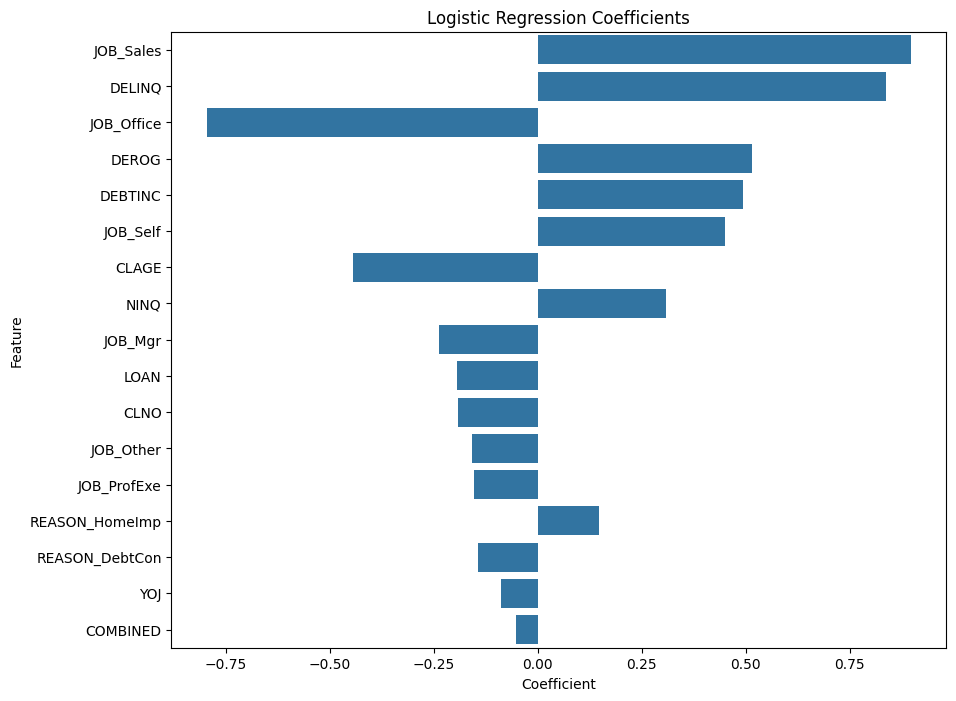

In [ ]:
# Get feature names
feature_names = X.columns

# Create a DataFrame for coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients.flatten()})

# Sort coefficients by absolute value
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

### Decision Tree

In [ ]:
X = df.drop('BAD', axis=1)        # Features
y = df['BAD']                     # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize decision tree classifier
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test_preprocessed)

# Evaluate performance
accuracy_dt = decision_tree_model.score(X_test_preprocessed, y_test)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree ROC AUC:", roc_auc_dt)
print("Decision Tree Classification Report:\n", classification_rep_dt)

Decision Tree Accuracy: 0.8582214765100671
Decision Tree ROC AUC: 0.7808410168732571
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       927
           1       0.70      0.64      0.67       265

    accuracy                           0.86      1192
   macro avg       0.80      0.78      0.79      1192
weighted avg       0.85      0.86      0.86      1192



### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Initialize decision tree classifier
decision_tree = DecisionTreeClassifier()

# Initialize grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search to find the best parameters
grid_search.fit(X_train_preprocessed, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to train the final model
best_decision_tree_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_dt_tuned = best_decision_tree_model.predict(X_test_preprocessed)

# Evaluate performance of the tuned model
accuracy_dt_tuned = best_decision_tree_model.score(X_test_preprocessed, y_test)
roc_auc_dt_tuned = roc_auc_score(y_test, y_pred_dt_tuned)
classification_rep_dt_tuned = classification_report(y_test, y_pred_dt_tuned)

print("Tuned Decision Tree Accuracy:", accuracy_dt_tuned)
print("Tuned Decision Tree ROC AUC:", roc_auc_dt_tuned)
print("Tuned Decision Tree Classification Report:\n", classification_rep_dt_tuned)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}
Best Score: 0.8835976426643436
Tuned Decision Tree Accuracy: 0.87751677852349
Tuned Decision Tree ROC AUC: 0.7784250269687163
Tuned Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       927
           1       0.80      0.60      0.69       265

    accuracy                           0.88      1192
   macro avg       0.85      0.78      0.80      1192
weighted avg       0.87      0.88      0.87      1192



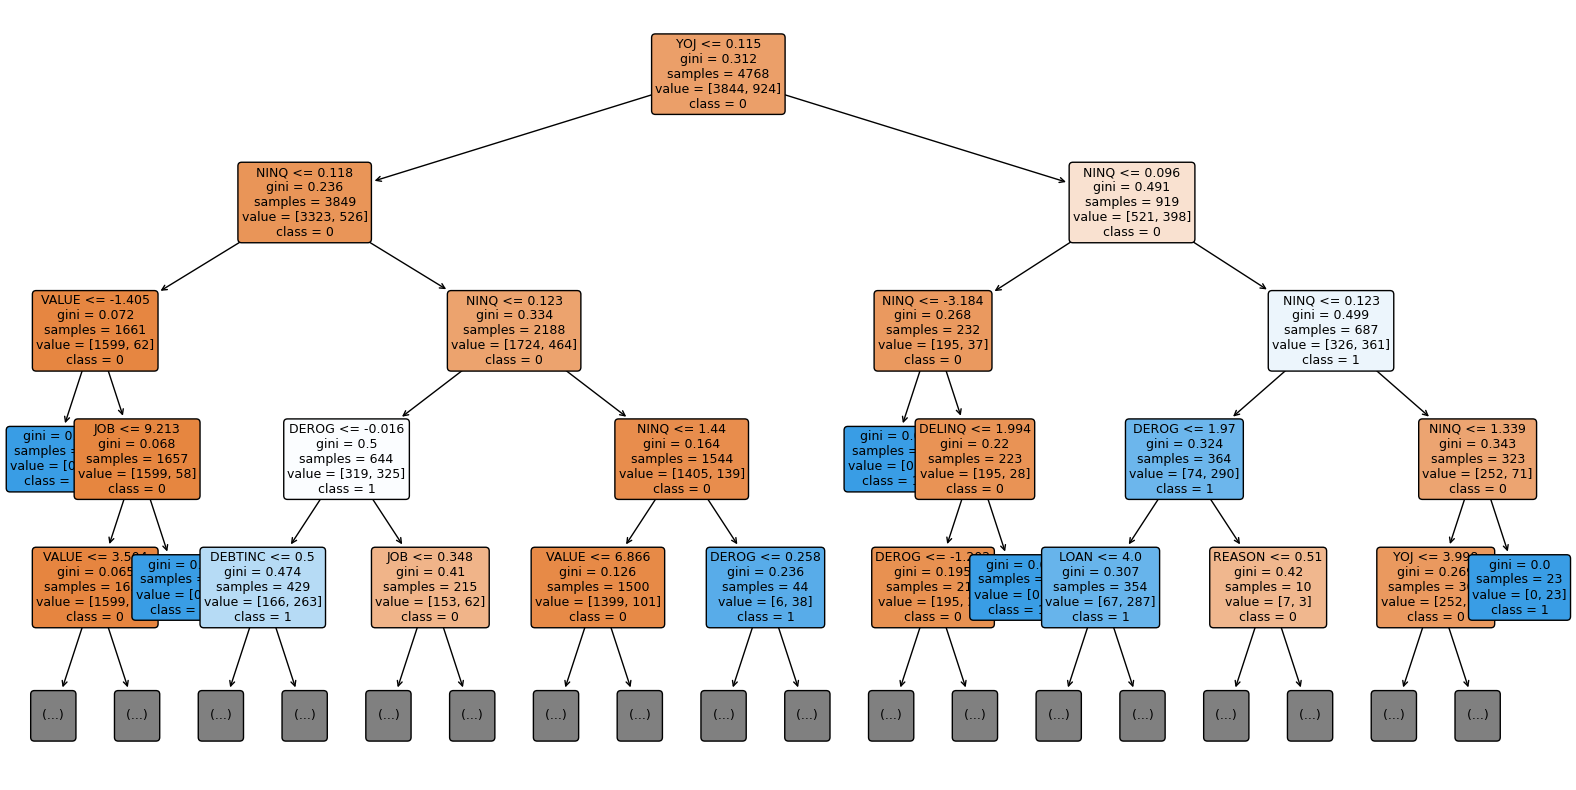

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(best_decision_tree_model,  class_names=['0', '1'], feature_names=X.columns,filled=True, rounded=True, fontsize=9, max_depth=4)
plt.show()

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
# Initialize Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test_preprocessed)

# Evaluate performance
accuracy_rf = random_forest_model.score(X_test_preprocessed, y_test)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest ROC AUC:", roc_auc_rf)
print("Random Forest Classification Report:\n", classification_rep_rf)

Random Forest Accuracy: 0.9110738255033557
Random Forest ROC AUC: 0.8323380350491543
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       927
           1       0.88      0.69      0.78       265

    accuracy                           0.91      1192
   macro avg       0.90      0.83      0.86      1192
weighted avg       0.91      0.91      0.91      1192



### **Random Forest Classifier Hyperparameter Tuning**

In [ ]:
# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Perform Grid Search
grid_search.fit(X_train_preprocessed, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_preprocessed)

# Evaluate performance of the best model
accuracy_best = best_model.score(X_test_preprocessed, y_test)
roc_auc_best = roc_auc_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print("Best Random Forest Accuracy:", accuracy_best)
print("Best Random Forest ROC AUC:", roc_auc_best)
print("Best Random Forest Classification Report:\n", classification_rep_best)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_dep

Let's compare performance of all 3 models:

In [ ]:
# Print perfromance reports for all 3 models

print(
    'Log Regression parameters: \n\n',
    classification_rep_logr, '\n',
    '-----------------------------------------------------------------\n',
    'Decision Tree parameters: \n\n',
    classification_rep_dt_tuned, '\n\n',
    '-----------------------------------------------------------------\n',
    'Random Forest parameters: \n\n',
    classification_rep_best
)

Log Regression parameters: 

               precision    recall  f1-score   support

           0       0.84      0.96      0.89       927
           1       0.72      0.34      0.46       265

    accuracy                           0.82      1192
   macro avg       0.78      0.65      0.68      1192
weighted avg       0.81      0.82      0.80      1192
 
 -----------------------------------------------------------------
 Decision Tree parameters: 

               precision    recall  f1-score   support

           0       0.89      0.96      0.92       927
           1       0.80      0.60      0.69       265

    accuracy                           0.88      1192
   macro avg       0.85      0.78      0.80      1192
weighted avg       0.87      0.88      0.87      1192
 

 -----------------------------------------------------------------
 Random Forest parameters: 

               precision    recall  f1-score   support

           0       0.92      0.98      0.94       927
          

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- All models have decent Accuracy. However it is not the only metric that should be considered as it is important to check unidentified defaults. So it is important to take Recall into consideration
- Performance of Log Regression is suboptimal as it has very little recall. Thus this model can't be implemented as it will led to high losses for unidentified defaults.
- Decision Tree and Random Forest models perform better than Log Regression with 60% for decision tree and 69% for Random Forest.
- Performance of Random Forest is better than Decision Tree with 77% f1-score for Defaults comparing with 69% for Decision Tree


**2. Refined insights:**
- The problem of identifying bad debts is the most serious one as not all models succeed in identification of bad debts
- There is a significant trade-off between model performance and interpretability. Most interpretable model (Log Regression) has suboptimal performance. The best performance has the model with low level of interpretability

**3. Proposal for the final solution design:**
- Performance of Random Forest model is significantly better than those for Log Regression and Decision Tree.
- Thus it doesn't provide interpertability, its implementation can provide institution with better profits from loans. Employees could be provided by features importance statistics
- Meanwhile even the better model has recall = 0.68. It means that 32% of defaults can be not identified. Perhaps, bank employees should have an ability to make a final decision after obtaining the results from the model if they have concerns about bad debt in each case